In [1]:
import pickle
import glob
from collections import Counter, defaultdict
import json
import newsplease
import minerva
import fastText as ft
import pandas as pd
import numpy as np

In [2]:
m = minerva.Minerva()

---

In [3]:
def load(fname):
    o = None
    with open(fname, "rb") as fin:
        o = pickle.load(fin)
    return o

def dump(o, fname):
    with open(fname, "wb") as fout:
        pickle.dump(o, fout)

---

In [170]:
pd.set_option('display.max_colwidth', 100)
m._Minerva__risk_data

,id,short_id,long_label,label,type,keywords,description,category,vector
0,ASSET,ASSET,Asset bubbles in a major economy,Asset bubbles in a major economy,Risk,"financial crises, banking crises, banking panics, recession, economic bubble, asset bubble, spec...","Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or...",Economic,"[-0.08505873, 0.019556038, 0.0442262, 0.014739149, 0.0007510881, -0.06862396, -0.03375716, 0.032..."
1,DEFLATION,DEFLATION,Deflation in a major economy,Deflation,Risk,"deflation, growth deflation, hoarding deflation, credit deflation, debt deflation, macroeconomic...",Prolonged near-zero inflation or deflation in a major economy or region,Economic,"[-0.10740217, 0.068878375, 0.016524509, 0.0138784, -0.02097979, -0.09326975, 0.011826792, 0.0045..."
2,FINANCIALMECH,FINANCIALMECH,Failure of a major financial mechanism or institution,Failure of financial mechanism or institution,Risk,"bank failure, illiquidity, illiquid, insolvent, global failure, financial crises, savings lost, ...",Collapse of a financial institution and/or malfunctioning of a financial system that impacts the...,Economic,"[-0.072594784, 0.072460495, 0.03638007, 0.02123094, -0.05338822, -0.07405142, -0.028528351, 0.01..."
3,CRITICALINFRA,CRITICALINFRA,Failure/shortfall of critical infrastructure,Failure of critical infrastructure,Risk,"failure of critical infrastructure, energy crises, cascading effect, transportation crises, comm...","Failure to adequately invest in, upgrade and/or secure infrastructure networks (e.g. energy, tra...",Economic,"[-0.062981285, 0.052816898, 0.086468466, 1.9597355e-05, -0.09430506, -0.0052090567, -0.037004247..."
4,FISCALCRISES,FISCALCRISES,Fiscal crises in key economies,Fiscal crises,Risk,"debt crises, sovereign debt, liquidity crises, macroeconomic vulnerability, macroeconomic debt",Excessive debt burdens that generate sovereign debt crises and/or liquidity crises,Economic,"[-0.11107647, 0.0429964, 0.02748474, -0.0013690824, -0.04949342, -0.06971179, -0.018248117, 0.05..."
5,UNEMPLOYMENT,UNEMPLOYMENT,High structural unemployment or underemployment,Unemployment or underemployment,Risk,"unemployment, job, jobs, employment crises, layoff, job crises, mass layoff, employment reductio...",A sustained high level of unemployment or underutilization of the productive capacity of the emp...,Economic,"[-0.08285182, 0.07296477, 0.023937372, -0.024935925, 0.007642543, -0.031445444, 0.033579215, 0.0..."
6,ILLICITTRADE,ILLICITTRADE,"Illicit trade (e.g. illicit financial flows, tax evasion, human trafficking, organized crime, etc.)",Illicit trade,Risk,"illicit trade, illicit financial flows, tax evasion, human trafficking, organized crime, counter...","Large-scale activities outside the legal framework such as illicit financial flows, tax evasion,...",Economic,"[-0.08996466, 0.040528156, 0.0019822915, -0.0074719884, -0.0030418602, -0.010007762, 0.005345972..."
7,ENERGY,ENERGY,Severe energy price shock (increase or decrease),Energy price shock,Risk,"energy price, energy crises, energy finance, energy access, efficient energy supply, electrical ...",Significant energy price increases or decreases that place further economic pressures on highly ...,Economic,"[-0.1019072, 0.10087774, 0.072774485, 0.013391656, -0.032783166, 0.0071929083, -0.026238142, 0.0..."
8,INFLATION,INFLATION,Unmanageable inflation,Unmanageable inflation,Risk,"inflation, high inflation, price increase, price levels, economy price, housing prices, oil pric...",Unmanageable increases in the general price levels of goods and services in key economies,Economic,"[-0.14934477, 0.07180878, 0.07808182, -0.029089276, -0.0045678145, -0.04971775, -0.004117151, -1..."
9,WEATHEREVENTS,WEATHEREVENTS,"Extreme weather events (e.g. floods, storms, etc.)",Extreme weather events,Risk,"extreme weather, flood, storm, natural dissaster, tropical storm, cyclone, drought, heat weave, ...","Major property, infrastructure and/or environmen

In [173]:
categories = sorted(list(set(m._Minerva__risk_data['category'])))

In [174]:
categories

['Economic', 'Environmental', 'Geopolitical', 'Societal', 'Technological']

In [179]:
df_latex_table = m._Minerva__risk_data[['id', 'category', 'long_label', 'description']].set_index('id')

In [192]:
df_latex_table

,category,long_label,description
id,,,
ASSET,Economic,Asset bubbles in a major economy,"Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or..."
DEFLATION,Economic,Deflation in a major economy,Prolonged near-zero inflation or deflation in a major economy or region
FINANCIALMECH,Economic,Failure of a major financial mechanism or institution,Collapse of a financial institution and/or malfunctioning of a financial system that impacts the...
CRITICALINFRA,Economic,Failure/shortfall of critical infrastructure,"Failure to adequately invest in, upgrade and/or secure infrastructure networks (e.g. energy, tra..."
FISCALCRISES,Economic,Fiscal crises in key economies,Excessive debt burdens that generate sovereign debt crises and/or liquidity crises
UNEMPLOYMENT,Economic,High structural unemployment or underemployment,A sustained high level of unemployment or underutilization of the productive capacity of the emp...
ILLICITTRADE,Economic,"Illicit trade (e.g. illicit financial flows, tax evasion, human trafficking, organized crime, etc.)","Large-scale activities outside the legal framework such as illicit financial flows, tax evasion,..."
ENERGY,Economic,Severe energy price shock (increase or decrease),Significant energy price increases or decreases that place further economic pressures on highly ...
INFLATION,Economic,Unmanageable inflation,Unmanageable increases in the general price levels of goods and services in key economies


In [199]:
for i,v in enumerate(df_latex_table.values):
    print("{} & {} \\\\".format(i+1, " & ".join(v)))

1 & Economic & Asset bubbles in a major economy & Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or region \\
2 & Economic & Deflation in a major economy & Prolonged near-zero inflation or deflation in a major economy or region \\
3 & Economic & Failure of a major financial mechanism or institution & Collapse of a financial institution and/or malfunctioning of a financial system that impacts the global economy \\
4 & Economic & Failure/shortfall of critical infrastructure & Failure to adequately invest in, upgrade and/or secure infrastructure networks (e.g. energy, transportation and communications), leading to pressure or a breakdown with system-wide implications \\
5 & Economic & Fiscal crises in key economies & Excessive debt burdens that generate sovereign debt crises and/or liquidity crises \\
6 & Economic & High structural unemployment or underemployment & A sustained high level of unemployment or underutilization of the productive c

In [195]:
pd.set_option('display.max_colwidth', -1)
m._Minerva__risk_data[m._Minerva__risk_data['id'] == 'MANMADECATA']['keywords']

13    oil spill, radioactive contamination, man-made damage, man-made disaster, enviromental crime, salinization, garbage, chemical plant explosion, chemical contamination, radiological contamination, nuclear explosion, oil fire, methane gas release, mud flow, asbestos contamination, toxic waste, mercury poisoning, e-waste, electronic waste, cyanide contamination, shrinking sea, industrial disaster, toxic chemical, smog, ariborne pollutants, manmade disaster, human overpopulation, biocapacity, carrying capacity, exploitation of natural resources, industrialization, land degradation, land reclamation, optimum population, overshoot population, population density, population dynamics, population growth, projections of population growth, total fertility rate, urbanization, waste, water conflict, water scarcity, overdrafting, hydrology, environmental impacts of reservoirs, tile drainage, hydrology, flooding, landslide, intensive farming, agricultural subsidy, environmental effects of meat p

---

In [4]:
infos_dir = "risk_info_extracted/"

In [7]:
info_files = sorted(glob.glob(infos_dir + "/*.pkl"))

In [9]:
infos = []
for f in info_files:
    with open(f, "rb") as fin:
        infos.append(pickle.load(fin))

In [10]:
len(infos)

28

In [12]:
len(infos[0])

7842

In [15]:
json_infos = []
for json_info in infos:
    json_infos.extend(json_info)

In [24]:
len(json_infos)

251933

In [25]:
pickle.dump(json_infos, open("json_infos.pkl", "wb"))

In [26]:
json_infos[0]

{'category': 'Societal',
 'category_prob': 0.26844912265080634,
 'date_publish': datetime.datetime(2018, 8, 5, 14, 3, 51),
 'entities': {'Asaduzzaman Khan',
  'Bangladesh',
  'Bangladesh Nationalist Party',
  'Bangladeshi',
  'Chowdhury',
  'DHAKA',
  'Dhaka',
  'Dhaka Bangladesh',
  'Dhaka University',
  'Hasina',
  'Marcia Bernicat',
  'Mohammad Ponir Hossain',
  'REUTERS',
  'Serajul Islam Chowdhury',
  'The U S',
  'U S'},
 'image_url': 'https://s4.reutersmedia.net/resources/r/?m=02&d=20180805&t=2&i=1290449244&w=1200&r=LYNXMPEE7408V',
 'risk': 'WATER',
 'risk_sim': 0.6379263913153423,
 'source_domain': 'www.reuters.com',
 'title': 'Bangladesh police fire tear gas to clear protesters blocking traffic',
 'url': 'https://www.reuters.com/article/us-bangladesh-protests/bangladesh-police-fire-tear-gas-to-clear-protesters-blocking-traffic-idUSKBN1KQ098',
 'week': '31',
 'year': '2018'}

In [59]:
time2risk = dict()
for info in json_infos:
    year_week = (int(info['year']), int(info['week']))
    
    if year_week not in time2risk:
        time2risk[year_week] = dict()
        
    if info['risk'] not in time2risk[year_week]:
        time2risk[year_week][info['risk']] = Counter()
    
    time2risk[year_week][info['risk']].update(info['entities'])

In [60]:
time2risk_items = list(time2risk.items())

In [61]:
time2risk_items[0]

((2011, 32),
 {'FOOD': Counter({'Africa': 1,
           'Braintree': 1,
           'Brooks Newmark': 1,
           'Central Suffolk': 1,
           'Dan Poulter': 1,
           'Dr Poulter': 1,
           'Education': 1,
           'Elizabeth': 1,
           'Girubuntu School': 1,
           'Gorleston': 1,
           'House': 1,
           'Kigali': 1,
           'Michael Ellis': 1,
           'Morrisons': 1,
           'NHS': 1,
           'Netherlands': 1,
           'Norman Lamb': 1,
           'Norman Lamb MP': 1,
           'North Ipswich': 1,
           'North Norfolk': 1,
           'North West Norfolk': 1,
           'Northampton': 1,
           'Richard Bacon': 1,
           'Rwanda': 1,
           'South Norfolk': 1,
           'VSO': 1,
           'Westminster': 1,
           'the James Paget Hospital': 1}),
  'SOCIALINSTABILITY': Counter({'Daily Express': 1,
           'Guardian': 1,
           'Hackney': 1,
           'Ken Livingstone': 1,
           'London': 1,
        

In [66]:
time2risk_2018 = {k:v for k,v in time2risk.items() if 2018 == k[0] and k[1] <= 31}

In [67]:
print(len(time2risk))
print(len(time2risk_2018))

409
31


In [68]:
for k in [k for k in time2risk.keys() if 2018 != k[0]][0:5]:
    print(k)

(2011, 32)
(2015, 29)
(2014, 47)
(2010, 49)
(2012, 43)


In [69]:
for k in sorted(time2risk_2018.keys()):
    print(k, len(time2risk_2018[k]))

(2018, 1) 19
(2018, 2) 19
(2018, 3) 20
(2018, 4) 19
(2018, 5) 20
(2018, 6) 21
(2018, 7) 20
(2018, 8) 20
(2018, 9) 21
(2018, 10) 21
(2018, 11) 20
(2018, 12) 19
(2018, 13) 21
(2018, 14) 20
(2018, 15) 20
(2018, 16) 20
(2018, 17) 20
(2018, 18) 20
(2018, 19) 20
(2018, 20) 20
(2018, 21) 20
(2018, 22) 20
(2018, 23) 20
(2018, 24) 19
(2018, 25) 20
(2018, 26) 21
(2018, 27) 19
(2018, 28) 20
(2018, 29) 21
(2018, 30) 19
(2018, 31) 21


In [71]:
pickle.dump(time2risk_2018, open("time2risk_2018.pkl", "wb"))

In [138]:
def jaccard_sim(a, b):
    return len(a.intersection(b)) / len(a.union(b))

# def compute_link_weights(risks, topn=10):
#     risk_keys = sorted(list(risks.keys()))
#     links = []
#     for i in range(len(risk_keys) - 1):
#         ri = risk_keys[i]
#         rj = risk_keys[i+1]
#         wij = jaccard_sim(set(risks[ri].keys()), set(risks[rj].keys()))
        
#         entities_in_common = risks[ri] & risks[rj]
#         entities_topn = entities_in_common.most_common(topn)
        
#         links.append((ri, rj, wij, entities_topn))
#     return links
        
def compute_link_weights(risks):
    risk_keys = sorted(list(risks.keys()))
    links = []
    for i in range(0, len(risk_keys)):
        for j in range(i+1, len(risk_keys)):
            ri = risk_keys[i]
            rj = risk_keys[j]
            wij = jaccard_sim(set(risks[ri].keys()), set(risks[rj].keys()))
            links.append((ri, rj, wij))
    return links
    

In [139]:
time2risk_links = dict()
for t in time2risk_2018.keys():
    time2risk_links[t] = compute_link_weights(time2risk_2018[t])
    

In [140]:
time2risk_links_items = list(time2risk_links.items())

In [141]:
sorted(time2risk_links_items, key=lambda x: x[0][1])[0:2]

[((2018, 1),
  [('ASSET', 'CRITICALINFRA', 0.033268101761252444),
   ('ASSET', 'DEFLATION', 0.02781740370898716),
   ('ASSET', 'ENERGY', 0.11505143475906876),
   ('ASSET', 'FAILUREURBAN', 0.037028969723371816),
   ('ASSET', 'FINANCIALMECH', 0.09610291335603481),
   ('ASSET', 'FOOD', 0.028470840348997398),
   ('ASSET', 'ILLICITTRADE', 0.08231545406266595),
   ('ASSET', 'INFECTIOUSDISEASES', 0.012265978050355068),
   ('ASSET', 'INFLATION', 0.1569713758079409),
   ('ASSET', 'INTERSTATE', 0.036577400391900716),
   ('ASSET', 'MIGRATION', 0.051668726823238566),
   ('ASSET', 'NATIONALGOV', 0.054589567327133035),
   ('ASSET', 'SOCIALINSTABILITY', 0.028729752770673488),
   ('ASSET', 'STATECOLLAPSE', 0.05398457583547558),
   ('ASSET', 'TERRORIST', 0.03898405197873597),
   ('ASSET', 'UNEMPLOYMENT', 0.11066559743384122),
   ('ASSET', 'WATER', 0.04482705134170932),
   ('ASSET', 'WMD', 0.031207598371777476),
   ('CRITICALINFRA', 'DEFLATION', 0.028070175438596492),
   ('CRITICALINFRA', 'ENERGY', 0.02

In [123]:
#pickle.dump(time2risk_links_items, open("time2risk_links_items.pkl", "wb"))

In [142]:
link_items = sorted(time2risk_links_items, key=lambda x: x[0][1])

In [259]:
minerva_entities = json.load(open("entities_minerva.json", "r"))
risk2info = {e['id']: e for e in minerva_entities}

In [6]:
risk2info

{'ASSET': {'category': 'Economic',
  'category_idx': 0,
  'description': 'Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or region',
  'id': 'ASSET',
  'keywords': 'financial crises, banking crises, banking panics, recession, economic bubble, asset bubble, speculative bubble, market bubble, price bubble, financial bubble, speculative mania, currency crises, sovereign debt, currency crises, financial sector instability, macroeconomic vulnerability, macroeconomic debt',
  'label': 'Asset bubbles in a major economy',
  'long_label': 'Asset bubbles in a major economy',
  'risk_idx': 0,
  'type': 'Risk'},
 'BIODIVERSITY': {'category': 'Environmental',
  'category_idx': 1,
  'description': 'Irreversible consequences for the environment, resulting in severely depleted resources for humankind as well as industries',
  'id': 'BIODIVERSITY',
  'keywords': 'biodiversity loss, loss of biodiversity, extinction, extinction of species, ecological impact,

In [190]:
def compute_topn_links(risk_links, topn=5):
    risk2links = dict()
    for ri, rj, wij in risk_links:
        if ri not in risk2links:
            risk2links[ri] = Counter()

        if rj not in risk2links:
            risk2links[rj] = Counter()

        risk2links[ri][rj] += wij
        risk2links[rj][ri] += wij
        
    topn_links = dict()
    for risk in risk2links.keys():
        topn_links[risk] = risk2links[risk].most_common(topn)
    return topn_links
        
            

In [208]:
topn_links = compute_topn_links(time2risk_links_items[4][1], topn=7)

In [209]:
topn_links

{'ASSET': [('ILLICITTRADE', 0.14090343970161626),
  ('INFLATION', 0.13178294573643412),
  ('ENERGY', 0.11318482841661649),
  ('FINANCIALMECH', 0.0942501481920569),
  ('UNEMPLOYMENT', 0.08822003113648158),
  ('STATECOLLAPSE', 0.056481979558902634),
  ('NATIONALGOV', 0.05355612682090831)],
 'CRITICALINFRA': [('WMD', 0.04132231404958678),
  ('INTERSTATE', 0.03436426116838488),
  ('STATECOLLAPSE', 0.03306878306878307),
  ('UNEMPLOYMENT', 0.03160270880361174),
  ('ILLICITTRADE', 0.0274869109947644),
  ('NATIONALGOV', 0.027375201288244767),
  ('INFECTIOUSDISEASES', 0.023762376237623763)],
 'DEFLATION': [('WMD', 0.018315018315018316),
  ('UNEMPLOYMENT', 0.0175),
  ('TERRORIST', 0.017142857142857144),
  ('INTERSTATE', 0.015151515151515152),
  ('INFECTIOUSDISEASES', 0.014598540145985401),
  ('INFLATION', 0.014285714285714285),
  ('STATECOLLAPSE', 0.01188707280832095)],
 'ENERGY': [('INFLATION', 0.13430180847909873),
  ('ASSET', 0.11318482841661649),
  ('ILLICITTRADE', 0.10868298368298368),
  ('

In [7]:
def generate_data_graph(topn_links, risk2info):
    json_data = list()
    for risk_i in topn_links.keys():
        risk_record = dict()
        risk_info = risk2info[risk_i]
        category = risk_info['category']
        category_idx = risk_info['category_idx']
        risk_idx = risk_info['risk_idx']
        name = risk_info['label']
        info = risk_info
        links = []
        for risk_j, wij in topn_links[risk_i]:
            links.append(("{}.{}".format(risk2info[risk_j]['category'], risk2info[risk_j]['label']), wij))
        
        risk_record = {
            'group': category_idx,
            'id': risk_idx,
            'links': links,
            'name': "{}.{}".format(category, name),
            'info': info
        }
        
        json_data.append(risk_record)
        
    return json_data

In [211]:
json_str = json.dumps(generate_data_graph(topn_links, risk2info), indent=4)

In [1]:
print(json_str)

NameError: name 'json_str' is not defined

In [221]:
# fetch risk categories:
cats = Counter()
for _, links in time2risk_links_items:
    for a, b, _ in links:
        cats[risk2info[a]['category']] += 1
        cats[risk2info[b]['category']] += 1

In [219]:
# [{u'id': u'0', u'name': u'Economic Risks'},
# {u'id': u'1', u'name': u'Environmental Risks'},
# {u'id': u'2', u'name': u'Geopolitical Risks'},
# {u'id': u'3', u'name': u'Societal Risks'},
# {u'id': u'4', u'name': u'Technological Risks'}]

In [222]:
cats

Counter({'Economic': 5136,
         'Geopolitical': 3024,
         'Societal': 3534,
         'Technological': 100})

---

In [5]:
articles = None
with open("201808_articles/articles_with_text.pkl", "rb") as fin:
    articles = pickle.load(fin)

In [6]:
len(articles)

25865

In [12]:
articles[0].get_dict()

{'authors': [],
 'date_download': datetime.datetime(2018, 8, 3, 2, 44, 53, tzinfo=tzutc()),
 'date_modify': None,
 'date_publish': datetime.datetime(2018, 8, 3, 2, 39, 58),
 'description': 'Rais wa Zimbabwe Emmerson Mnangagwa ameshinda uchaguzi wa urais nchini Zimbabwe kwa mujibu wa tume ya uchaguzi ya nchi hiyo.',
 'filename': 'https%3A%2F%2Fwww.bbc.com%2Fswahili%2Fhabari-45054310.json',
 'image_url': 'https://ichef.bbci.co.uk/news/1024/branded_swahili/68B1/production/_102810862__102809937_048385698-1.jpg',
 'language': 'sw',
 'localpath': None,
 'source_domain': 'www.bbc.com',
 'text': 'Rais wa Zimbabwe Emmerson Mnangagwa ameshinda uchaguzi wa urais nchini Zimbabwe kwa mujibu wa tume ya uchaguzi ya nchi hiyo.\nKatika majimbo 10 yote yalioyotangazwa, Mnangagwa ameshinda kwa asilimia 50.8 ya kura kwa asilimia 44.3 alizopata mgombea wa chama cha upinzani Nelson Chamise.\nHaki miliki ya picha Getty Images Image caption Zimbabwe Emmerson Mnangagwa\nPolisi waliwaondoa upinzani wakati wa ku

In [20]:
articles_en = [a for a in [x for x in articles if x.get_dict()['title'] is not None] if m.detect_language(a.get_dict()['title'].replace("\n", " "))[0] == 'en']

In [21]:
len(articles), len(articles_en)

(25865, 21060)

In [3]:
#pickle.dump(articles_en, open("201808_articles/articles_with_text_en.pkl", "wb"))
articles_en = pickle.load(open("201808_articles/articles_with_text_en.pkl", "rb"))

In [4]:
len(articles_en)

21060

In [17]:
articles_en[0].get_dict()

{'authors': ['Harry Sumnall',
  'Prof In Substance Use',
  'John Moores University'],
 'date_download': datetime.datetime(2018, 8, 3, 2, 45, 43, tzinfo=tzutc()),
 'date_modify': None,
 'date_publish': datetime.datetime(2018, 8, 3, 2, 44, 1),
 'description': 'Who actually uses a drug blamed for violence, environmental and social problems?',
 'filename': 'https%3A%2F%2Fwww.bbc.com%2Fnews%2Fuk-45036469.json',
 'image_url': 'https://ichef.bbci.co.uk/news/1024/branded_news/11FBC/production/_102806637_dance.jpg',
 'language': 'en',
 'localpath': None,
 'source_domain': 'www.bbc.com',
 'text': 'Image copyright Getty Images\n"Middle-class" cocaine users have been accused by police and politicians of fuelling crime. But who actually uses the drug?\nThe problem, says the UK\'s most senior police officer, is a group of middle-class people who worry about "global warming and fair trade... but think there is no harm in taking a bit of cocaine".\nThe comments, from Metropolitan Police Commissioner C

In [5]:
article = articles_en[0]
doc_vec = m.get_vector(article.get_dict()['text'])
lang, proba = m.detect_language(article.get_dict()['title'])
print(lang)
is_risk = m.is_risk(doc_vec)
is_risk

en


True

In [6]:
print(m.transform(article))

{'category': 'Economic', 'entities': {('Metropolitan Police', 'ORG'), ('BBC', 'ORG'), ('Harry Sumnall', 'PERSON'), ("the Home Office's Crime Survey for England", 'ORG'), ('UK', 'GPE'), ('London', 'GPE'), ('England', 'GPE'), ('Sadiq Khan', 'PERSON'), ('the Misuse of Drugs', 'ORG'), ('PA Image', 'ORG'), ('Cressida Dick', 'PERSON'), ('the Public Health Institute Liverpool John Moores University', 'ORG'), ('Wales', 'GPE'), ('the Office for National Statistics ONS', 'ORG'), ('Getty Images Middle', 'PERSON'), ("Cosmopolitan'", 'ORG'), ('the UK Advisory Council', 'ORG'), ('Londoners', 'NORP')}, 'date_publish': datetime.datetime(2018, 8, 3, 2, 44, 1), 'title': 'Cocaine The drug that is more than a middle class problem', 'image_url': 'https://ichef.bbci.co.uk/news/1024/branded_news/11FBC/production/_102806637_dance.jpg', 'source_domain': 'www.bbc.com', 'year': '2018', 'risk_sim': 0.740582524892557, 'risk': 'ILLICITTRADE', 'url': 'https://www.bbc.com/news/uk-45036469', 'week': '31'}


In [25]:
ft_lang_model = ft.load_model("lid.176.ftz")

In [26]:
ft_lang_model.predict(article.get_dict()['title'])

(('__label__en',), array([0.96333271]))

In [5]:
%%time
risk_infos = []
count = 0
n_articles = len(articles_en)
for article in articles_en:
    risk_info = m.transform(article)
    if risk_info:
        risk_infos.append((article.get_dict(), risk_info))
    count += 1
    if count % 1000 == 0:
        print("processing {}/{} articles. Successfully extracted: {}".format(count, n_articles, len(risk_infos)))
pickle.dump(risk_infos, open('20180816_risk_infos.pkl', 'wb'))
print("done.")

ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
/datax1/minerva/CC-NEWS/minerva/toolbox.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' 

processing 1000/21060 articles. Successfully extracted: 670


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 2000/21060 articles. Successfully extracted: 1465


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 3000/21060 articles. Successfully extracted: 2156


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 4000/21060 articles. Successfully extracted: 2849


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 5000/21060 articles. Successfully extracted: 3516


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 6000/21060 articles. Successfully extracted: 4209


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 7000/21060 articles. Successfully extracted: 4898
processing 8000/21060 articles. Successfully extracted: 5589


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 9000/21060 articles. Successfully extracted: 6244


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 10000/21060 articles. Successfully extracted: 7012


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 11000/21060 articles. Successfully extracted: 7688


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 12000/21060 articles. Successfully extracted: 8424


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 13000/21060 articles. Successfully extracted: 9196


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 14000/21060 articles. Successfully extracted: 9910


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 15000/21060 articles. Successfully extracted: 10604


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'


processing 16000/21060 articles. Successfully extracted: 11245


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 17000/21060 articles. Successfully extracted: 11985


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 18000/21060 articles. Successfully extracted: 12742


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 19000/21060 articles. Successfully extracted: 13466


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 20000/21060 articles. Successfully extracted: 14105


ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/minerva.py", line 244, in transform
    year = article_info['date_publish'].strftime("%Y")
AttributeError: 'NoneType' object has no attribute 'strftime'
ERROR:minerva:'NoneType' object has no attribute 'strftime'
Traceback (most recent call last):
  File "/datax1/minerva/CC-NEWS/minerva/m

processing 21000/21060 articles. Successfully extracted: 14832
done.
CPU times: user 8h 45min 13s, sys: 19h 30min 16s, total: 1d 4h 15min 30s
Wall time: 59min 28s


---

In [12]:
%%time
articles_with_is_risk_flag = []
count = 0
n_articles = len(articles_en)
for article in [a.get_dict() for a in articles_en]:
    is_risk_from_title, _ = m.is_risk(m.get_vector(article['title']))
    is_risk_from_text, _ = m.is_risk(m.get_vector(article['text']))
    article['is_risk_from_title'] = is_risk_from_title
    article['is_risk_from_text'] = is_risk_from_text
    articles_with_is_risk_flag.append(article)
    count += 1
    if count % 1000 == 0:
        print("processing {}/{} articles. Passed: {}".format(count, n_articles, len(articles_with_is_risk_flag)))
print("done.")

processing 1000/21060 articles. Passed: 1000
processing 2000/21060 articles. Passed: 2000
processing 3000/21060 articles. Passed: 3000
processing 4000/21060 articles. Passed: 4000
processing 5000/21060 articles. Passed: 5000
processing 6000/21060 articles. Passed: 6000
processing 7000/21060 articles. Passed: 7000
processing 8000/21060 articles. Passed: 8000
processing 9000/21060 articles. Passed: 9000
processing 10000/21060 articles. Passed: 10000
processing 11000/21060 articles. Passed: 11000
processing 12000/21060 articles. Passed: 12000
processing 13000/21060 articles. Passed: 13000
processing 14000/21060 articles. Passed: 14000
processing 15000/21060 articles. Passed: 15000
processing 16000/21060 articles. Passed: 16000
processing 17000/21060 articles. Passed: 17000
processing 18000/21060 articles. Passed: 18000
processing 19000/21060 articles. Passed: 19000
processing 20000/21060 articles. Passed: 20000
processing 21000/21060 articles. Passed: 21000
done.
CPU times: user 9h 34min 

In [15]:
pickle.dump(articles_with_is_risk_flag, open('20180816_articles_with_is_risk_flag.pkl', 'wb'))

In [16]:
no_risk = [a for a in articles_with_is_risk_flag if a['is_risk_from_title'] == False]
yes_risk = [a for a in articles_with_is_risk_flag if a['is_risk_from_title'] == True]

In [17]:
len(yes_risk), len(no_risk)

(15024, 6036)

In [18]:
list(enumerate([(a['title'], a['is_risk_from_title'], a['is_risk_from_text']) for a in no_risk[0:25]]))

[(0, ("'A gimmicky tournament': AFLW draw under fire", False, True)),
 (1,
  ('Baltimore Ravens LB Kamalei Correa sacks Chicago Bears QB Chase Daniel',
   False,
   True)),
 (2,
  ('Watch Ravens LB Kamalei Correa intercept Bears QB Chase Daniel',
   False,
   True)),
 (3, ('Watch Ravens QB Lamar Jackson throw his 1st NFL TD', False, True)),
 (4,
  ('Ravens Robert Griffin III hits Maxx Williams for TD in HOF Game',
   False,
   True)),
 (5,
  ('Ravens QB Lamar Jackson throws 1st career NFL interception in HOF game',
   False,
   True)),
 (6,
  ('Josh Woodrum, not Lamar Jackson plays after RG3 for Ravens vs. Bears',
   False,
   True)),
 (7, ('Watch Chuck Clark get an INT off a tipped pass', False, True)),
 (8,
  ("Ray Lewis does famous 'Squirrel Dance' to enter Hall of Fame Game",
   False,
   True)),
 (9,
  ('Kerri Walsh Jennings plans to chase gold in Tokyo, retire', False, True)),
 (10,
  ('Scherzer fans 10, Nationals cruise to 10-4 win over Reds', False, True)),
 (11, ('Franco’s 3-r

In [19]:
no_risk[19]

{'authors': ['Gavino Borquez'],
 'date_download': datetime.datetime(2018, 8, 3, 3, 16, 51, tzinfo=tzutc()),
 'date_modify': None,
 'date_publish': datetime.datetime(2018, 8, 3, 1, 32, 4),
 'description': 'Los Angeles Chargers WR Dylan Cantrell is the real deal.',
 'filename': 'https%3A%2F%2Fchargerswire.usatoday.com%2F2018%2F08%2F02%2Fchargers-wr-dylan-cantrell-is-the-real-deal%2F.json',
 'image_url': 'https://usatchargerswire.files.wordpress.com/2018/08/usatsi_11009320.jpg?w=1024&h=576&crop=1',
 'is_risk_from_text': True,
 'is_risk_from_title': False,
 'language': 'en',
 'localpath': None,
 'source_domain': 'chargerswire.usatoday.com',
 'text': "Despite not being a significant need for the Chargers, selecting a wide receiver was something the team needed to address with the rocky 2017 season from WR Mike Williams. That is why the selection of former Texas Tech WR Dylan Cantrell made complete sense, and he has been off to a great start in training camp.\nGeno Smith dropping a dime to D

In [49]:
categories_info = m._Minerva__categories_info

In [50]:
categories = m._Minerva__categories

In [51]:
doc_vec = m.get_vector(no_risk[19]['title'])

In [59]:
is_risk, category_risk_probas = m.is_risk(doc_vec)

In [60]:
is_risk, category_risk_probas

(True,
 {'Economic': 0.17263663926568157,
  'Environmental': 1.9716101205773607e-06,
  'Geopolitical': 0.1930683446079942,
  'Societal': 0.3443055917691066,
  'Technological': 0.03554732421128643})

In [69]:
def is_risk(m, doc_vec, threshold=0.5, max_deviations=3):
    """check if the text is considered a risk in at least one category, if so, we process the article"""
    is_risk = False
    category_risk_probas = dict()
    for category in m._Minerva__categories:
        categories_info = m._Minerva__categories_info[category]
        risk_proba = m.risk_proba(doc_vec,
                                     categories_info['centroid'],
                                     categories_info['median'],
                                     categories_info['mad'],
                                     max_deviation=max_deviations)
        category_risk_probas[category] = risk_proba
        is_risk = is_risk or (risk_proba > threshold)
    return is_risk, category_risk_probas

In [95]:
print(no_risk[19]['title'])
doc_vec = m.get_vector(no_risk[19]['title'])
is_risk(m, doc_vec, threshold=0.5, max_deviations=5)

Macron and May to discuss Brexit at president’s summer residence


(True,
 {'Economic': 0.6065767027951383,
  'Environmental': 1.4568154275093546e-05,
  'Geopolitical': 0.6387182406346673,
  'Societal': 0.795081905017748,
  'Technological': 0.21404792479022594})

In [96]:
print(no_risk[20]['title'])
doc_vec = m.get_vector(no_risk[20]['title'])
doc_vec = m.get_vector(no_risk[20]['title'])

Kerri Walsh Jennings plans to chase gold in Tokyo, retire


In [97]:
is_risk(m, doc_vec, threshold=0.5, max_deviations=5)

(False,
 {'Economic': 0.29794394367347166,
  'Environmental': 4.062034756343838e-07,
  'Geopolitical': 0.22867371417245203,
  'Societal': 0.2803551564084976,
  'Technological': 0.07263414165810911})

---

In [28]:
#risk_infos = pickle.load(open('20180816_risk_infos.pkl', 'rb'))

In [9]:
len(risk_infos)

14872

In [8]:
def count_articles_per_category(risk_infos):
    counts = Counter()
    for _,r in risk_infos:
        if r['category'] is None:
            print(r)
        counts[r['category']] += 1
    return counts

In [9]:
def count_articles_per_risk(risk_infos):
    counts = Counter()
    for _,r in risk_infos:
        if r['risk'] is None:
            print(r)
        counts[r['risk']] += 1
    return counts

In [10]:
counts = count_articles_per_category(risk_infos)

In [13]:
len(counts), counts

(5,
 Counter({'Economic': 5618,
          'Environmental': 867,
          'Geopolitical': 5245,
          'Societal': 1693,
          'Technological': 1447}))

In [15]:
risk_counts = count_articles_per_risk(risk_infos)

In [16]:
len(risk_counts), risk_counts

(30,
 Counter({'ASSET': 261,
          'BIODIVERSITY': 18,
          'CRITICALINFO': 674,
          'CRITICALINFRA': 492,
          'CYBERATTACKS': 16,
          'DATAFRAUD': 723,
          'DEFLATION': 4,
          'ENERGY': 1552,
          'FAILURECLIMATE': 242,
          'FAILUREURBAN': 141,
          'FINANCIALMECH': 324,
          'FISCALCRISES': 1,
          'FOOD': 964,
          'ILLICITTRADE': 1234,
          'INFECTIOUSDISEASES': 47,
          'INFLATION': 595,
          'INTERSTATE': 127,
          'MANMADECATA': 115,
          'MIGRATION': 114,
          'NATIONALGOV': 1735,
          'NATURALCATA': 22,
          'REGIONALGOV': 6,
          'SOCIALINSTABILITY': 182,
          'STATECOLLAPSE': 2630,
          'TECHADV': 34,
          'TERRORIST': 418,
          'UNEMPLOYMENT': 1155,
          'WATER': 245,
          'WEATHEREVENTS': 470,
          'WMD': 329}))

In [18]:
len(risk_infos[0])

2

In [19]:
risk_infos[0][1]

{'category': 'Economic',
 'date_publish': datetime.datetime(2018, 8, 3, 2, 44, 1),
 'entities': {('BBC', 'ORG'),
  ("Cosmopolitan'", 'ORG'),
  ('Cressida Dick', 'PERSON'),
  ('England', 'GPE'),
  ('Getty Images Middle', 'PERSON'),
  ('Harry Sumnall', 'PERSON'),
  ('London', 'GPE'),
  ('Londoners', 'NORP'),
  ('Metropolitan Police', 'ORG'),
  ('PA Image', 'ORG'),
  ('Sadiq Khan', 'PERSON'),
  ('UK', 'GPE'),
  ('Wales', 'GPE'),
  ("the Home Office's Crime Survey for England", 'ORG'),
  ('the Misuse of Drugs', 'ORG'),
  ('the Office for National Statistics ONS', 'ORG'),
  ('the Public Health Institute Liverpool John Moores University', 'ORG'),
  ('the UK Advisory Council', 'ORG')},
 'image_url': 'https://ichef.bbci.co.uk/news/1024/branded_news/11FBC/production/_102806637_dance.jpg',
 'risk': 'ILLICITTRADE',
 'risk_sim': 0.740582524892557,
 'source_domain': 'www.bbc.com',
 'title': 'Cocaine The drug that is more than a middle class problem',
 'url': 'https://www.bbc.com/news/uk-45036469',


---

In [5]:
risk_infos = pickle.load(open("20180816_risk_infos.pkl", "rb"))

In [6]:
risk2entities = m.extract_risk_entities([x[1] for x in risk_infos])

In [11]:
len(risk2entities)

30

In [13]:
#%%time
#link_weights = m.compute_link_weights(risk2entities)

CPU times: user 4h 12min 1s, sys: 6h 21min 40s, total: 10h 33min 42s
Wall time: 38min 13s


In [8]:
%%time
link_weights_jaccard = m.compute_link_weights_jaccard(risk2entities)

CPU times: user 1.31 s, sys: 35.7 ms, total: 1.35 s
Wall time: 1.34 s


In [9]:
link_weights_jaccard[0]

('ASSET', 'BIODIVERSITY', 0.014691478942213516)

In [14]:
topn_links = m.compute_topn_links(link_weights, topn=8)

In [15]:
list(topn_links.items())[0:3]

[('CYBERATTACKS',
  [('CRITICALINFO', 0.9709996581077576),
   ('FOOD', 0.968190610408783),
   ('UNEMPLOYMENT', 0.9653646945953369),
   ('CRITICALINFRA', 0.9648153185844421),
   ('STATECOLLAPSE', 0.9614080190658569),
   ('WATER', 0.9604334235191345),
   ('ILLICITTRADE', 0.9590217471122742),
   ('SOCIALINSTABILITY', 0.9567191004753113)]),
 ('BIODIVERSITY',
  [('FAILURECLIMATE', 0.9768692255020142),
   ('MANMADECATA', 0.9738864898681641),
   ('WEATHEREVENTS', 0.9649942517280579),
   ('WMD', 0.9622997641563416),
   ('FAILUREURBAN', 0.9593351483345032),
   ('WATER', 0.9591048955917358),
   ('ILLICITTRADE', 0.9542853236198425),
   ('CRITICALINFRA', 0.9523928165435791)]),
 ('FAILURECLIMATE',
  [('MANMADECATA', 0.9876286387443542),
   ('WMD', 0.9841687083244324),
   ('FAILUREURBAN', 0.9830839037895203),
   ('ENERGY', 0.9829814434051514),
   ('ILLICITTRADE', 0.9817671179771423),
   ('WEATHEREVENTS', 0.9813915491104126),
   ('DATAFRAUD', 0.9795820713043213),
   ('CRITICALINFRA', 0.97819572687149

In [4]:
#dump(topn_links, "20180826_topn_links.pkl")
topn_links = load("20180826_topn_links.pkl")

In [14]:
graph_data = m.generate_data_graph(topn_links, risk2info)

In [18]:
#json.dump(graph_data, open("graph_data.json", "w"), indent=4)

In [5]:
!pwd

/datax1/minerva/CC-NEWS/minerva


In [23]:
topn_links_items = list(topn_links.items())

In [25]:
len(topn_links_items)

30

In [12]:
def load_ground_truth(fname):
    links = defaultdict(Counter)
    is_header = True
    with open(fname, "r") as fin:
        for l in fin:
            if is_header:
                is_header = False
                continue
            source, target, type_, strength = l.strip().split("\t")
            if type_ != "Risk-Risk":
                continue
            source = source.replace("R_", "")
            target = target.replace("R_", "")
            links[source][target] += int(strength)
            links[target][source] += int(strength)
    return links
            

In [42]:
gt_links = load_ground_truth("wef_ground_truth/2018/connections.tsv")

In [183]:
'WMD' in set(gt_links.keys())

True

In [184]:
gt_links['WMD'].most_common()

[('INTERSTATE', 22),
 ('REGIONALGOV', 19),
 ('TERRORIST', 19),
 ('NATIONALGOV', 8),
 ('STATECOLLAPSE', 7),
 ('SOCIALINSTABILITY', 7),
 ('MANMADECATA', 6),
 ('MIGRATION', 6),
 ('TECHADV', 5),
 ('CRITICALINFO', 5),
 ('CRITICALINFRA', 4),
 ('INFECTIOUSDISEASES', 4),
 ('CYBERATTACKS', 3),
 ('BIODIVERSITY', 2),
 ('FISCALCRISES', 2),
 ('ENERGY', 2),
 ('FINANCIALMECH', 1),
 ('ILLICITTRADE', 1),
 ('DATAFRAUD', 1),
 ('FOOD', 1)]

In [185]:
topn_links['WMD']

[('STATECOLLAPSE', 0.9954507350921631),
 ('ILLICITTRADE', 0.9947289228439331),
 ('CRITICALINFRA', 0.9940470457077026),
 ('UNEMPLOYMENT', 0.9910762310028076),
 ('FOOD', 0.9907660484313965),
 ('DATAFRAUD', 0.9906792044639587),
 ('WATER', 0.9897316694259644),
 ('SOCIALINSTABILITY', 0.9873296618461609)]

In [10]:
def precision(relevant, retrieved):
    return 0.0 if len(retrieved) == 0 else len(relevant.intersection(retrieved)) / len(retrieved)

def recall(relevant, retrieved):
    return 0.0 if len(relevant)  == 0 else len(relevant.intersection(retrieved)) / len(relevant)

def jaccard(relevant, retrieved):
    return len(relevant.intersection(retrieved)) / len(relevant.union(retrieved))

In [191]:
topn = 1
prec = []
rec = []
jac  = []
for r in topn_links.keys():
    risks_true = set([x for x in gt_links[r].keys()])
    risks_pred = set([x[0] for x in topn_links[r]][:topn])
    prec.append(precision(risks_true, risks_pred))
    rec.append(recall(risks_true, risks_pred))
    jac.append(jaccard(risks_true, risks_pred))
    
    

In [192]:
np.mean(prec), np.mean(rec), np.mean(jac)

(0.9666666666666667, 0.042300699355928326, 0.042300699355928326)

In [168]:
p = np.mean(prec)
r = np.mean(rec)
f1 = 2 * p * r /(p + r)

In [169]:
f1

0.08105450665913477

In [170]:
(0.75 + 0.87 + 0.88)/3

0.8333333333333334

---

In [14]:
topn_links_jaccard = m.compute_topn_links(link_weights_jaccard, topn=8)

In [16]:
topn_links_items_jaccard = list(topn_links_jaccard.items())

In [82]:
def compute_prec_rec_f1_jac_metrics(gt_links, topn_links, topn=1):
    prec = []
    rec = []
    jac  = []
    for r in topn_links.keys():
        risks_true = set([x for x in gt_links[r].keys()])
        risks_pred = set([x[0] for x in topn_links[r]][:topn])
        prec.append(precision(risks_true, risks_pred))
        rec.append(recall(risks_true, risks_pred))
        jac.append(jaccard(risks_true, risks_pred))
    
    mean_prec, mean_rec, mean_jac = np.mean(prec), np.mean(rec), np.mean(jac)
    f1 = 2 * mean_prec * mean_rec / (mean_prec + mean_rec)
    return np.asarray([mean_prec, mean_rec, f1, mean_jac])
    

In [105]:
topn=5
'jaccard:', compute_prec_rec_f1_jac_metrics(gt_links, topn_links_jaccard, topn), 'embedding',compute_prec_rec_f1_jac_metrics(gt_links, topn_links, topn)

('jaccard:',
 array([0.96666667, 0.04236109, 0.08116536, 0.04236109]),
 'embedding',
 array([0.96666667, 0.0423007 , 0.08105451, 0.0423007 ]))

In [126]:
topn=3
metrics_mean_jac = []
metrics_mean_embedding = []

for year in [2015, 2016, 2017, 2018]:
    print('year ', year)
    gt_links = load_ground_truth("wef_ground_truth/{}/connections.tsv".format(year))
    metrics_mean_jac.append(compute_prec_rec_f1_jac_metrics(gt_links, topn_links_jaccard, topn))
    metrics_mean_embedding.append(compute_prec_rec_f1_jac_metrics(gt_links, topn_links, topn))

year  2015
year  2016
year  2017
year  2018


In [127]:
metrics_mean_jac

[array([0.64444444, 0.10767505, 0.18452012, 0.10403241]),
 array([0.76666667, 0.14056896, 0.23757783, 0.13673171]),
 array([0.91111111, 0.12315811, 0.21698552, 0.12186385]),
 array([0.93333333, 0.12217988, 0.21607413, 0.12138899])]

In [128]:
np.mean(metrics_mean_jac, axis=0)

array([0.81388889, 0.1233955 , 0.2137894 , 0.12100424])

In [129]:
metrics_mean_embedding

[array([0.67777778, 0.11569272, 0.19764807, 0.11295944]),
 array([0.74444444, 0.13819501, 0.23311558, 0.1338689 ]),
 array([0.88888889, 0.12087811, 0.21281585, 0.11930366]),
 array([0.87777778, 0.1147972 , 0.20304044, 0.11353005])]

In [125]:
np.mean(metrics_mean_embedding, axis=0)

array([0.79722222, 0.12239076, 0.21165499, 0.11991551])

In [130]:
#dump(topn_links_jaccard, "201808_topn_links_jaccard.pkl")

---

In [9]:
topn_links_jaccard = load("201808_topn_links_jaccard.pkl")

In [10]:
json_str = json.dumps(generate_data_graph(topn_links_jaccard, risk2info), indent=4)

In [12]:
print(json_str)

[
    {
        "info": {
            "label": "Unemployment or underemployment",
            "long_label": "High structural unemployment or underemployment",
            "category": "Economic",
            "risk_idx": 5,
            "id": "UNEMPLOYMENT",
            "type": "Risk",
            "description": "A sustained high level of unemployment or underutilization of the productive capacity of the employed population",
            "keywords": "unemployment, job, jobs, employment crises, layoff, job crises, mass layoff, employment reduction, underemployment, labor hoarding, poverty, recession, jobs and poverty, job creation, cyclical unemployment, labor market performance, labor markets, jobs and development, working conditions, inclusive jobs, jobs in fragile states, job rotation",
            "category_idx": 0
        },
        "group": 0,
        "id": 5,
        "name": "Economic.Unemployment or underemployment",
        "links": [
            [
                "Economic.Illici

---

In [258]:
def generate_data_graph_x(topn_links, risk2info):
    nodes = risk2info
    links = list()
    
    link_counter = 0
    for risk_i in topn_links.keys():
        for risk_j, wij in topn_links[risk_i]:
            links.append({"id": link_counter, "source": risk_i, "target": risk_j, "weight": wij})
            link_counter += 1
        
    return {"nodes" : nodes, "links" : links}


In [23]:
risk2info

{'ASSET': {'category': 'Economic',
  'category_idx': 0,
  'description': 'Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or region',
  'id': 'ASSET',
  'keywords': 'financial crises, banking crises, banking panics, recession, economic bubble, asset bubble, speculative bubble, market bubble, price bubble, financial bubble, speculative mania, currency crises, sovereign debt, currency crises, financial sector instability, macroeconomic vulnerability, macroeconomic debt',
  'label': 'Asset bubbles in a major economy',
  'long_label': 'Asset bubbles in a major economy',
  'risk_idx': 0,
  'type': 'Risk'},
 'BIODIVERSITY': {'category': 'Environmental',
  'category_idx': 1,
  'description': 'Irreversible consequences for the environment, resulting in severely depleted resources for humankind as well as industries',
  'id': 'BIODIVERSITY',
  'keywords': 'biodiversity loss, loss of biodiversity, extinction, extinction of species, ecological impact,

In [17]:
topn_links_jaccard

{'ASSET': [('INFLATION', 0.13223308883455584),
  ('FINANCIALMECH', 0.11444141689373297),
  ('INTERSTATE', 0.0733464309102816),
  ('ENERGY', 0.05985389340860037),
  ('TECHADV', 0.0460717749757517),
  ('UNEMPLOYMENT', 0.04276920617155648),
  ('MIGRATION', 0.04270109235352532),
  ('MANMADECATA', 0.041474654377880185)],
 'BIODIVERSITY': [('TECHADV', 0.037091988130563795),
  ('MANMADECATA', 0.03207810320781032),
  ('MIGRATION', 0.02483343428225318),
  ('INTERSTATE', 0.021897810218978103),
  ('FAILURECLIMATE', 0.021360314783586284),
  ('INFECTIOUSDISEASES', 0.019174041297935103),
  ('FAILUREURBAN', 0.019100169779286927),
  ('SOCIALINSTABILITY', 0.016736401673640166)],
 'CRITICALINFO': [('ILLICITTRADE', 0.08619210977701544),
  ('FOOD', 0.08483714788732394),
  ('UNEMPLOYMENT', 0.08063696425546332),
  ('CRITICALINFRA', 0.07798974030137865),
  ('STATECOLLAPSE', 0.07567218293427146),
  ('NATIONALGOV', 0.07433687318443735),
  ('ENERGY', 0.07201727959984085),
  ('DATAFRAUD', 0.07128580946035976)],


In [36]:
graph_data_x = generate_data_graph_x(topn_links_jaccard, risk2info)

In [37]:
print(json.dumps(graph_data_x))

{"nodes": {"DEFLATION": {"label": "Deflation", "long_label": "Deflation in a major economy", "category": "Economic", "risk_idx": 1, "id": "DEFLATION", "type": "Risk", "description": "Prolonged near-zero inflation or deflation in a major economy or region", "keywords": "deflation, growth deflation, hoarding deflation, credit deflation, debt deflation, macroeconomic vulnerability, macroeconomic debt", "category_idx": 0}, "ASSET": {"label": "Asset bubbles in a major economy", "long_label": "Asset bubbles in a major economy", "category": "Economic", "risk_idx": 0, "id": "ASSET", "type": "Risk", "description": "Unsustainably overpriced assets such as commodities, housing, shares, etc. in a major economy or region", "keywords": "financial crises, banking crises, banking panics, recession, economic bubble, asset bubble, speculative bubble, market bubble, price bubble, financial bubble, speculative mania, currency crises, sovereign debt, currency crises, financial sector instability, macroecon

In [38]:
json.dump(graph_data_x, open("graph_data_x.json", "w"), indent=4)

In [34]:
!pwd

/datax1/minerva/CC-NEWS/minerva


---

In [38]:
!ls ../extracted_risk_info/2018/

01  02	03  04	05  06	07  08	09  10	11  12


In [48]:
#!ls ../extracted_risk_info/2018/08

In [13]:
rinfo = load("../extracted_risk_info/2018/08/CC-NEWS-20180828030943-00320.extracted.pkl")

In [17]:
rinfo[0][0].get_dict(), rinfo[0][1]

({'authors': ['Michael Safi'],
  'date_download': datetime.datetime(2018, 8, 28, 3, 9, 44, tzinfo=tzutc()),
  'date_modify': None,
  'date_publish': datetime.datetime(2018, 8, 28, 1, 48, 45),
  'description': 'Sahebrao lost toes in a trap in India six years ago and has been in pain ever since',
  'filename': 'https%3A%2F%2Fwww.theguardian.com%2Fworld%2F2018%2Faug%2F28%2Ftiger-injured-poacher-to-get-fake-paw-india.json',
  'image_url': 'https://i.guim.co.uk/img/media/2cdafce5dfa2e035e68dabf0a77968183d03f8c7/0_0_5328_3197/master/5328.jpg?width=1200&height=630&quality=85&auto=format&usm=12&fit=crop&crop=faces%2Centropy&bm=normal&ba=bottom%2Cleft&blend64=aHR0cHM6Ly9hc3NldHMuZ3VpbS5jby51ay9pbWFnZXMvb3ZlcmxheXMvZDM1ODZhNWVmNTc4MTc1NmQyMWEzYjYzNWU1MTcxNDEvdGctZGVmYXVsdC5wbmc&s=d90a3a3cee9559e0b5842730f1dd4ceb',
  'language': 'en',
  'localpath': None,
  'source_domain': 'www.theguardian.com',
  'text': "Sahebrao lost toes in a trap in India six years ago and has been in pain ever since\nToes 

In [22]:
[x[0] for x in rinfo[0][1]['entities'] if x[1] == 'GPE' ]

['Switzerland',
 'US',
 'CT',
 'Maharashtra',
 'UK',
 'India',
 'Florida',
 'Arizona',
 'Nagpur']

In [34]:
def compute_entity_freq(rinfo):
    entity_freq = Counter()
    for ri in rinfo:
        entities = [x for x in ri[1]['entities']]
        entity_freq.update(entities)
    return entity_freq
    

In [35]:
entity_freq = compute_entity_freq(rinfo)

In [36]:
len(entity_freq)

4823

In [37]:
entity_freq.most_common(25)

[(('U S', 'ORG'), 74),
 (('the United States', 'GPE'), 59),
 (('REUTERS', 'ORG'), 56),
 (('China', 'GPE'), 53),
 (('Reuters', 'ORG'), 48),
 (('Donald Trump', 'PERSON'), 47),
 (('US', 'GPE'), 39),
 (('Mexico', 'GPE'), 34),
 (('Chinese', 'NORP'), 34),
 (('The Associated Press', 'ORG'), 33),
 (('Trump', 'ORG'), 32),
 (('American', 'NORP'), 32),
 (('U S', 'GPE'), 31),
 (('Washington', 'GPE'), 30),
 (('Canada', 'GPE'), 30),
 (('Australia', 'GPE'), 28),
 (('Irish', 'NORP'), 28),
 (('the U S', 'GPE'), 25),
 (('Ireland', 'GPE'), 25),
 (('Australian', 'NORP'), 23),
 (('Dublin', 'GPE'), 22),
 (('Japan', 'GPE'), 22),
 (('Japanese', 'NORP'), 19),
 (('New York', 'GPE'), 19),
 (('America', 'GPE'), 19)]

In [39]:
base_dir = '../extracted_risk_info/2018/'
months = ['01', '02', '03', '04', '05', '06', '07', '08']

In [41]:
entity_freq = Counter()
for month in months:
    files = glob.glob(base_dir + month + "/" + '*.pkl')
    for f in files:
        rinfo = load(f)
        entity_freq.update(compute_entity_freq(rinfo))
        

In [42]:
len(entity_freq)

2565769

In [46]:
entity_freq.most_common(25)

[(('Reuters', 'ORG'), 173682),
 (('U S', 'ORG'), 128044),
 (('Donald Trump', 'PERSON'), 93557),
 (('Trump', 'ORG'), 88527),
 (('the United States', 'GPE'), 87978),
 (('REUTERS', 'ORG'), 83591),
 (('US', 'GPE'), 80515),
 (('China', 'GPE'), 76079),
 (('UK', 'GPE'), 63120),
 (('Washington', 'GPE'), 60570),
 (('Russia', 'GPE'), 57959),
 (('Chinese', 'NORP'), 56294),
 (('American', 'NORP'), 55701),
 (('Europe', 'LOC'), 51592),
 (('European', 'NORP'), 50576),
 (('London', 'GPE'), 49811),
 (('British', 'NORP'), 49518),
 (('Britain', 'GPE'), 49462),
 (('U S', 'GPE'), 49033),
 (('Ireland', 'GPE'), 44817),
 (('CNN', 'ORG'), 42676),
 (('Trump', 'PERSON'), 39977),
 (('India', 'GPE'), 39874),
 (('the U S', 'GPE'), 39794),
 (('Facebook', 'ORG'), 39401)]

In [47]:
dump(entity_freq, 'entity_freq_all.pkl')

---

In [51]:
all_rinfo = list()
for month in months:
    files = glob.glob(base_dir + month + "/" + '*.pkl')
    for f in files:
        rinfo = load(f)
        all_rinfo.extend(rinfo)

In [52]:
len(all_rinfo)

954114

In [55]:
time2risk = m.extract_risk_entities_over_time([x[1] for x in all_rinfo])

In [62]:
time2risk_valid = {k:v for k,v in time2risk.items() if k[0] == 2018 and k[1] < 36} 

In [63]:
len(time2risk), len(time2risk_valid)

(540, 35)

In [64]:
list(time2risk_valid)[0:3]

[(2018, 7), (2018, 19), (2018, 28)]

In [128]:
time2risk_valid[(2018, 7)]['ASSET'].most_common(25)

[(('Reuters', 'ORG'), 465),
 (('U S', 'ORG'), 414),
 (('U S', 'GPE'), 172),
 (('Japan', 'GPE'), 168),
 (('US', 'GPE'), 164),
 (('Asian', 'NORP'), 157),
 (('European', 'NORP'), 146),
 (('China', 'GPE'), 129),
 (('Treasury', 'ORG'), 127),
 (('Japanese', 'NORP'), 123),
 (('Asia', 'LOC'), 120),
 (('LONDON', 'GPE'), 111),
 (('Fed', 'ORG'), 108),
 (('the U S', 'GPE'), 107),
 (('FX', 'ORG'), 105),
 (('Europe', 'LOC'), 98),
 (('Brent', 'PERSON'), 97),
 (('German', 'NORP'), 93),
 (('the S P', 'ORG'), 86),
 (('New York', 'GPE'), 84),
 (('UK', 'GPE'), 84),
 (('the Federal Reserve', 'ORG'), 82),
 (('Australian', 'NORP'), 77),
 (('the United States', 'GPE'), 76),
 (('Asia Pacific', 'ORG'), 75)]

In [71]:
N = sum(entity_freq.values())

19017692

In [80]:
entity_tfidf = Counter()
for k in time2risk_valid[(2018, 7)]['ASSET'].keys():
    entity_tfidf[k] = (1.0 + np.log(time2risk_valid[(2018, 7)]['ASSET'][k])) * np.log(N/entity_freq[k])

In [83]:
time2risk_valid[(2018, 7)]['ASSET'].most_common(30)

[(('Reuters', 'ORG'), 465),
 (('U S', 'ORG'), 414),
 (('U S', 'GPE'), 172),
 (('Japan', 'GPE'), 168),
 (('US', 'GPE'), 164),
 (('Asian', 'NORP'), 157),
 (('European', 'NORP'), 146),
 (('China', 'GPE'), 129),
 (('Treasury', 'ORG'), 127),
 (('Japanese', 'NORP'), 123),
 (('Asia', 'LOC'), 120),
 (('LONDON', 'GPE'), 111),
 (('Fed', 'ORG'), 108),
 (('the U S', 'GPE'), 107),
 (('FX', 'ORG'), 105),
 (('Europe', 'LOC'), 98),
 (('Brent', 'PERSON'), 97),
 (('German', 'NORP'), 93),
 (('the S P', 'ORG'), 86),
 (('New York', 'GPE'), 84),
 (('UK', 'GPE'), 84),
 (('the Federal Reserve', 'ORG'), 82),
 (('Australian', 'NORP'), 77),
 (('the United States', 'GPE'), 76),
 (('Asia Pacific', 'ORG'), 75),
 (('Germany', 'GPE'), 70),
 (('Chinese', 'NORP'), 69),
 (('Jacob Zuma', 'PERSON'), 68),
 (('S P', 'ORG'), 66),
 (('MSCI', 'ORG'), 64)]

In [115]:
def extract_authors(rinfos):
    authors = set()
    for article in [x[0] for x in rinfos]:
        authors.update(set([a.lower() for a in article.get_dict()['authors']]))
    return authors

In [116]:
authors = extract_authors(all_rinfo)

In [117]:
len(authors)

47074

In [118]:
list(authors)[0:10]

['jonathan wackrow',
 'kassy dillon',
 'frank peters worldwide news',
 'editor-in-chief',
 'theo resnikoff',
 'entertainment media',
 'mary lou mcdonald',
 'pat borzi',
 'susannah cunningham',
 'san francisco.']

In [119]:
[x for x in entity_tfidf.most_common() if x[0][1]=='PERSON'][0:10]

[(('Aziz Sunderji', 'PERSON'), 49.7504353725832),
 (('Bovespa 80898', 'PERSON'), 49.7504353725832),
 (('Mark McCormick North American', 'PERSON'), 49.371499028003164),
 (('Jacob Zuma', 'PERSON'), 49.21218610428357),
 (('Joseph LaVorgna', 'PERSON'), 48.2765600160632),
 (('McCormick', 'PERSON'), 47.75500681699823),
 (('Greg McKenna', 'PERSON'), 47.707331838895435),
 (('Shinichi Saoshiro', 'PERSON'), 46.72078670088281),
 (('Jason Goldberg', 'PERSON'), 46.10277663331113),
 (('Zuma', 'PERSON'), 45.31795915927193)]

In [121]:
[x for x in entity_tfidf.most_common() if x[0][1]=='PERSON' and x[0][0].lower() not in authors][0:10]

[(('Aziz Sunderji', 'PERSON'), 49.7504353725832),
 (('Bovespa 80898', 'PERSON'), 49.7504353725832),
 (('Mark McCormick North American', 'PERSON'), 49.371499028003164),
 (('Jacob Zuma', 'PERSON'), 49.21218610428357),
 (('Joseph LaVorgna', 'PERSON'), 48.2765600160632),
 (('McCormick', 'PERSON'), 47.75500681699823),
 (('Greg McKenna', 'PERSON'), 47.707331838895435),
 (('Jason Goldberg', 'PERSON'), 46.10277663331113),
 (('Zuma', 'PERSON'), 45.31795915927193),
 (('Grohowski', 'PERSON'), 45.29943887985815)]

In [109]:
'Shinichi Saoshiro' in authors

True

In [124]:
'efe' in authors

True

In [125]:
dump(authors, "article_authors.pkl")

---

In [157]:
def clean_entities(time2risk, blacklist):
    time2risk_clean = dict()
    for t in time2risk.keys():
        if t not in time2risk_clean:
            time2risk_clean[t] = dict()
        for r in time2risk[t].keys():
            if r not in time2risk_clean[t]:
                time2risk_clean[t][r] = Counter()
            time2risk_clean[t][r].update({k:v for k,v 
                                          in time2risk[t][r].items() 
                                          if (k[0].lower() not in blacklist and (k[1] == 'PERSON' or k[1] == 'ORG'))
                                          or (k[1] != 'PERSON' and k[1] != 'ORG')
                                         })
    return time2risk_clean

In [155]:
time2risk_clean = clean_entities(time2risk_valid, authors)

In [139]:
time2risk_valid[(2018, 7)]['ASSET'].most_common(10)

[(('Reuters', 'ORG'), 465),
 (('U S', 'ORG'), 414),
 (('U S', 'GPE'), 172),
 (('Japan', 'GPE'), 168),
 (('US', 'GPE'), 164),
 (('Asian', 'NORP'), 157),
 (('European', 'NORP'), 146),
 (('China', 'GPE'), 129),
 (('Treasury', 'ORG'), 127),
 (('Japanese', 'NORP'), 123)]

In [156]:
time2risk_clean[(2018, 7)]['ASSET'].most_common(10)

[(('U S', 'ORG'), 414),
 (('U S', 'GPE'), 172),
 (('Japan', 'GPE'), 168),
 (('US', 'GPE'), 164),
 (('Asian', 'NORP'), 157),
 (('European', 'NORP'), 146),
 (('China', 'GPE'), 129),
 (('Treasury', 'ORG'), 127),
 (('Japanese', 'NORP'), 123),
 (('Asia', 'LOC'), 120)]

In [158]:
dump(time2risk_clean, "time2risk.pkl")

---

In [186]:
def compute_link_weights_jaccard(time2risk):
    time2link_weights_jaccard = dict()
    for t in time2risk.keys():
        risk2entities = time2risk[t]
        link_weights_jaccard = m.compute_link_weights_jaccard(risk2entities)
        time2link_weights_jaccard[t] = link_weights_jaccard
    return time2link_weights_jaccard

In [188]:
%%time
time2link_weights_jaccard = compute_link_weights_jaccard(time2risk_clean)

CPU times: user 1min 4s, sys: 1.19 s, total: 1min 5s
Wall time: 1min 5s


In [189]:
dump(time2link_weights_jaccard, "time2link_weights_jaccard.pkl")

---

In [191]:
def compute_topn_links(time2link_weights_jaccard, topn=8):
    time2topn_links = dict()
    for t in time2link_weights_jaccard.keys():
        time2topn_links[t] = m.compute_topn_links(time2link_weights_jaccard[t], topn=topn)
    return time2topn_links

In [192]:
time2topn_links = compute_topn_links(time2link_weights_jaccard)

In [193]:
time2topn_links[(2018, 24)]

{'ASSET': [('INFLATION', 0.11062022090059473),
  ('FINANCIALMECH', 0.08990649724286742),
  ('INTERSTATE', 0.08727810650887574),
  ('TECHADV', 0.04841093865484109),
  ('ENERGY', 0.045118654250525685),
  ('MIGRATION', 0.03844182470527934),
  ('MANMADECATA', 0.035924617196702),
  ('FAILURECLIMATE', 0.03551912568306011)],
 'BIODIVERSITY': [('INFECTIOUSDISEASES', 0.024630541871921183),
  ('MANMADECATA', 0.018626929217668974),
  ('REGIONALGOV', 0.01818181818181818),
  ('TECHADV', 0.015650741350906095),
  ('CYBERATTACKS', 0.014344262295081968),
  ('MIGRATION', 0.013245033112582781),
  ('INTERSTATE', 0.012713936430317848),
  ('SOCIALINSTABILITY', 0.012433944668946224)],
 'CRITICALINFO': [('ILLICITTRADE', 0.09752705953096813),
  ('CRITICALINFRA', 0.09510173323285606),
  ('FOOD', 0.0908937832558766),
  ('NATIONALGOV', 0.08614839044969583),
  ('ENERGY', 0.08542995866939529),
  ('DATAFRAUD', 0.08496013197690404),
  ('UNEMPLOYMENT', 0.08363457114689452),
  ('WMD', 0.08359463188260378)],
 'CRITICALI

In [194]:
dump(time2topn_links, "time2topn_links.pkl")

---

In [202]:
len(set(time2risk_clean[(2018, 24)]['ASSET']).intersection(set(time2risk_clean[(2018, 24)]['INFLATION']))) / len(set(time2risk_clean[(2018, 24)]['ASSET']).union(set(time2risk_clean[(2018, 24)]['INFLATION'])))

0.10647010647010648

In [205]:
len(set(time2risk_clean[(2018, 24)]['ASSET']).intersection(set(time2risk_clean[(2018, 24)]['INFLATION']))) 

650

In [204]:
set(time2risk_clean[(2018, 24)]['ASSET']).intersection(set(time2risk_clean[(2018, 24)]['INFLATION']))

{('21st Century', 'ORG'),
 ('A50', 'ORG'),
 ('AFS Group', 'ORG'),
 ('ANZ', 'ORG'),
 ('ARABIA', 'GPE'),
 ('ASX 200', 'PRODUCT'),
 ('ATHENS', 'GPE'),
 ('Aberdeen Standard Investments', 'ORG'),
 ('Abu Dhabi’s', 'ORG'),
 ('Adyen', 'LOC'),
 ('Africa', 'LOC'),
 ('Again Capital', 'ORG'),
 ('Ahn Young joon', 'PERSON'),
 ('Air China Ltd', 'ORG'),
 ('America', 'GPE'),
 ('American', 'NORP'),
 ('Amsterdam', 'GPE'),
 ('Andrew Milligan', 'PERSON'),
 ('Angela Merkel', 'PERSON'),
 ('Anil', 'GPE'),
 ('Anil D’Silva', 'PERSON'),
 ('Antofagasta', 'GPE'),
 ('Arab', 'NORP'),
 ('Argentina', 'GPE'),
 ('Argentine', 'NORP'),
 ('Arne Petimezas', 'PERSON'),
 ('Asia', 'LOC'),
 ('Asia Pacific', 'ORG'),
 ('Asian', 'NORP'),
 ('Athens', 'GPE'),
 ('Australia', 'GPE'),
 ('Australian', 'NORP'),
 ('Austria', 'GPE'),
 ('Aveva', 'ORG'),
 ('BAHRAIN', 'ORG'),
 ('BENGALURU Reuters', 'ORG'),
 ('BMO Capital Markets', 'ORG'),
 ('BNP Paribas', 'ORG'),
 ('BNP Paribas’ Shing', 'ORG'),
 ('BNY Mellon ADR', 'ORG'),
 ('BOJ', 'GPE'),
 ('

In [208]:
time2risk_clean[(2018, 24)]['ASSET'][('ATHENS', 'GPE')]

2

In [221]:
def compute_tfidf(risk_i, risk_j, risk2entities, global_entity_freq):
    entity_tfidf = Counter()
    entities_i = set(risk2entities[risk_i])
    entities_j = set(risk2entities[risk_j])
    common_entities = entities_i.intersection(entities_j)
    entities_freq = Counter({k:v for k,v in risk2entities[risk_i].items() if k in common_entities}) + \
                    Counter({k:v for k,v in risk2entities[risk_j].items() if k in common_entities})
    for k in entities_freq.keys():
        #tf*idf computation. 
        #Recommended tf–idf weighting scheme number 3: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
        entity_tfidf[k] = (1.0 + np.log1p(entities_freq[k])) * np.log1p(N/global_entity_freq[k])
    return entity_tfidf

In [222]:
entity_tfidf = compute_tfidf('ASSET', 'INFLATION', time2risk_clean[(2018, 24)], entity_freq)

In [223]:
entity_tfidf.most_common()[0:10]

[(('Group of Seven’s', 'ORG'), 53.25070320846566),
 (('Stefan Kreuzkamp', 'PERSON'), 52.77207407938207),
 (('the U S Federal Reserve', 'ORG'), 51.25307410176571),
 (('the European Central Bank', 'ORG'), 51.068704257891696),
 (('Carnell', 'PERSON'), 51.04186366547202),
 (('Ray Attrill', 'PERSON'), 50.31122625786498),
 (('ECB', 'ORG'), 50.10137705983533),
 (('Coinrail', 'PERSON'), 49.89719097329678),
 (('Arne Petimezas', 'PERSON'), 49.75043757152861),
 (('ECB TOKYO Reuters', 'ORG'), 49.44766375271561)]

In [239]:
def rank_per_entity_type(entity_tfidf, e_types=['PERSON', 'ORG', 'GPE'], topn=10):
    rank = defaultdict(list)
    for ((e, e_type), _) in entity_tfidf.most_common():
        if e_type not in e_types:
            continue
        rank[e_type].append(e)
    #trim:
    for k in rank.keys():
        rank[k] = rank[k][0:topn]
    return dict(rank)

In [240]:
rank_e = rank_per_entity_type(entity_tfidf)

In [241]:
rank_e

{'GPE': ['Vienna',
  'MSCI',
  'Tokyo',
  'Singapore',
  'Bengaluru',
  'Italy',
  'Japan',
  'U S Korea',
  'the U S Midwest',
  'North Korea'],
 'ORG': ['Group of Seven’s',
  'the U S Federal Reserve',
  'the European Central Bank',
  'ECB',
  'ECB TOKYO Reuters',
  'The European Central Bank',
  'The U S Federal Reserve',
  'AFS Group',
  'the U S Federal Reserve’s',
  'the Bank of Japan'],
 'PERSON': ['Stefan Kreuzkamp',
  'Carnell',
  'Ray Attrill',
  'Coinrail',
  'Arne Petimezas',
  'Andrew Milligan',
  'Tai Hui',
  'Gregory Anderson',
  'Brent',
  'David Zahn']}

In [254]:
def compute_entity_rank(time2topn_links, time2risk_clean, entity_freq):
    entity_rank = dict()
    for t in time2topn_links.keys():
        topn_links = time2topn_links[t]
        if t not in entity_rank:
            entity_rank[t] = dict()
        for ri in topn_links.keys():
            if ri not in entity_rank[t]:
                entity_rank[t][ri] = list()
            for (rj, wij) in  topn_links[ri]:
                entity_tfidf = compute_tfidf(ri, rj, time2risk_clean[t], entity_freq)
                rank_e = rank_per_entity_type(entity_tfidf)
                entity_rank[t][ri].append((rj, wij, rank_e))
    return entity_rank

In [255]:
%%time
time2topn_links_and_entity_rank = compute_entity_rank(time2topn_links)

CPU times: user 1min 56s, sys: 1.69 s, total: 1min 57s
Wall time: 1min 57s


In [256]:
time2topn_links_and_entity_rank[(2018, 24)]

{'ASSET': [('INFLATION',
   0.11062022090059473,
   {'GPE': ['Vienna',
     'MSCI',
     'Tokyo',
     'Singapore',
     'Bengaluru',
     'Italy',
     'Japan',
     'U S Korea',
     'the U S Midwest',
     'North Korea'],
    'ORG': ['Group of Seven’s',
     'the U S Federal Reserve',
     'the European Central Bank',
     'ECB',
     'ECB TOKYO Reuters',
     'The European Central Bank',
     'The U S Federal Reserve',
     'AFS Group',
     'the U S Federal Reserve’s',
     'the Bank of Japan'],
    'PERSON': ['Stefan Kreuzkamp',
     'Carnell',
     'Ray Attrill',
     'Coinrail',
     'Arne Petimezas',
     'Andrew Milligan',
     'Tai Hui',
     'Gregory Anderson',
     'Brent',
     'David Zahn']}),
  ('FINANCIALMECH',
   0.08990649724286742,
   {'GPE': ['MSCI',
     'Shenzhen',
     'the U S Federal Reserve',
     'Tokyo',
     'Italy',
     'King of Prussia Pennsylvania',
     'North Korea',
     'Frankfurt',
     'Japan',
     'The S P 500'],
    'ORG': ['the European Centr

In [257]:
dump(time2topn_links_and_entity_rank, "time2topn_links_and_entity_rank.pkl")

---

In [304]:
def generate_data_graph_with_entity(topn_links, risk2info):
    links = list()
    nodes_with_links = set()
    link_counter = 0
    for risk_i in topn_links.keys():
        nodes_with_links.add(risk_i)
        for risk_j, wij, entities in topn_links[risk_i]:
            nodes_with_links.add(risk_j)
            links.append({"id": link_counter, "source": risk_i, "target": risk_j, "weight": wij, "entities": entities})
            link_counter += 1
    nodes = {k:v for k,v in risk2info.items() if k in nodes_with_links}   
    return {"nodes" : nodes, "links" : links}

In [305]:
def generate_time2data_graph_with_entity(time2topn_links, risk2info):
    time2datagraph = dict()
    for t in time2topn_links.keys():
        topn_links = time2topn_links[t]
        graph_data_x = generate_data_graph_with_entity(topn_links, risk2info)
        time2datagraph[t] = graph_data_x
    return time2datagraph

In [306]:
time2datagraph = generate_time2data_graph_with_entity(time2topn_links_and_entity_rank, risk2info)

In [307]:
dump(time2datagraph, 'time2datagraph.pkl')

In [308]:
time2datagraph[(2018, 7)]

{'links': [{'entities': {'GPE': ['Bridgewater',
     'Haiti',
     'Pyeongchang',
     'Bennell',
     'Ghosn',
     'Natixis',
     'Sochi',
     'Florida',
     'Broward County',
     'EUROPE'],
    'ORG': ['General Dynamics',
     'Sonae SGPS SA',
     'Danone',
     'Standard Life Aberdeen',
     'NET',
     'Purdue',
     'DEC',
     'Aegon',
     'Schneider Electric',
     'Airbus Nestle'],
    'PERSON': ['Penny Mordaunt',
     'Lighthizer',
     'Barry Bennell',
     'Blankfein',
     'Helen Reid ECB',
     'Valentine',
     'Praet Mersch',
     'Glen Moreno',
     'David Holmes',
     'Barrick']},
   'id': 0,
   'source': 'ILLICITTRADE',
   'target': 'UNEMPLOYMENT',
   'weight': 0.10163010666130005},
  {'entities': {'GPE': ["South Africa's",
     'Pyeongchang',
     'Broward County',
     'Thabo Mbeki',
     'JOHANNESBURG',
     'GANGNEUNG South Korea',
     'Kuwait',
     'Oxfam',
     'South Africa’s',
     'Fort Lauderdale'],
    'ORG': ['ANC',
     'the Munich Security Conf

In [ ]:
# 'source': 'ILLICITTRADE',
# 'target': 'UNEMPLOYMENT',

In [270]:
risk2info.keys()

dict_keys(['ILLICITTRADE', 'FISCALCRISES', 'MANMADECATA', 'WMD', 'SOCIALINSTABILITY', 'REGIONALGOV', 'NATIONALGOV', 'WATER', 'NATURALCATA', 'CRITICALINFO', 'WEATHEREVENTS', 'FAILUREURBAN', 'DEFLATION', 'MIGRATION', 'FOOD', 'INFLATION', 'FAILURECLIMATE', 'UNEMPLOYMENT', 'INTERSTATE', 'CYBERATTACKS', 'DATAFRAUD', 'FINANCIALMECH', 'TECHADV', 'ASSET', 'CRITICALINFRA', 'BIODIVERSITY', 'STATECOLLAPSE', 'ENERGY', 'INFECTIOUSDISEASES', 'TERRORIST'])

In [273]:
risk2info['ILLICITTRADE'], risk2info['UNEMPLOYMENT']

({'category': 'Economic',
  'category_idx': 0,
  'description': 'Large-scale activities outside the legal framework such as illicit financial flows, tax evasion, human trafficking, counterfeiting and/or organized crime that undermine social interactions, regional or international collaboration, and global growth',
  'id': 'ILLICITTRADE',
  'keywords': 'illicit trade, illicit financial flows, tax evasion, human trafficking, organized crime, counterfitting, crime illegal drugs, crime caterls, crime, crime networks, drug trade, trade policy and integration, trade linkages spillovers and connectivity, economic trade dispute, trade balance, imact of trade, natural resources trafficking, illicit financial flows',
  'label': 'Illicit trade',
  'long_label': 'Illicit trade (e.g. illicit financial flows, tax evasion, human trafficking, organized crime, etc.)',
  'risk_idx': 6,
  'type': 'Risk'},
 {'category': 'Economic',
  'category_idx': 0,
  'description': 'A sustained high level of unemploym

---

In [309]:
#dumping graph data files:
for t in time2datagraph.keys():
    y, w = t
    json.dump(time2datagraph[t], open("graph_data/{}W{:02}_graph_data.json".format(y, w), "w"), indent=4)

In [310]:
time2datagraph.keys()

dict_keys([(2018, 7), (2018, 19), (2018, 28), (2018, 9), (2018, 21), (2018, 30), (2018, 11), (2018, 33), (2018, 23), (2018, 13), (2018, 35), (2018, 25), (2018, 2), (2018, 15), (2018, 27), (2018, 4), (2018, 16), (2018, 29), (2018, 6), (2018, 18), (2018, 31), (2018, 8), (2018, 20), (2018, 1), (2018, 10), (2018, 32), (2018, 22), (2018, 3), (2018, 12), (2018, 34), (2018, 24), (2018, 5), (2018, 14), (2018, 17), (2018, 26)])

In [311]:
json.dump({"graph_data/{}W{:02}".format(k[0], k[1]):v for k,v in time2datagraph.items()}, open("time2datagraph.json", "w") ,indent=4)

---

In [4]:
time2link_weights_jaccard = load("time2link_weights_jaccard.pkl")

In [11]:
keys = list(time2link_weights_jaccard.keys())
keys = sorted(keys)

In [19]:
time2link_weights_jaccard[keys[0]]

[('ASSET', 'BIODIVERSITY', 0.01551418439716312),
 ('ASSET', 'CRITICALINFO', 0.027157289832236538),
 ('ASSET', 'CRITICALINFRA', 0.0335577212900633),
 ('ASSET', 'CYBERATTACKS', 0.013999066728884742),
 ('ASSET', 'DATAFRAUD', 0.029515017552984007),
 ('ASSET', 'DEFLATION', 0.01708984375),
 ('ASSET', 'ENERGY', 0.048067970204841715),
 ('ASSET', 'FAILURECLIMATE', 0.03310537768106932),
 ('ASSET', 'FAILUREURBAN', 0.03549867181840135),
 ('ASSET', 'FINANCIALMECH', 0.07814822679974517),
 ('ASSET', 'FISCALCRISES', 0.0004901960784313725),
 ('ASSET', 'FOOD', 0.025751651611163544),
 ('ASSET', 'ILLICITTRADE', 0.04107622198639116),
 ('ASSET', 'INFECTIOUSDISEASES', 0.018810148731408575),
 ('ASSET', 'INFLATION', 0.09620253164556962),
 ('ASSET', 'INTERSTATE', 0.03636363636363636),
 ('ASSET', 'MANMADECATA', 0.03843537414965986),
 ('ASSET', 'MIGRATION', 0.03854875283446712),
 ('ASSET', 'NATIONALGOV', 0.019883040935672516),
 ('ASSET', 'NATURALCATA', 0.002448579823702253),
 ('ASSET', 'REGIONALGOV', 0.0227272727

In [135]:
def extract_timeseries(links):
    #all_pairs = set()
    time_keys = sorted(links.keys())
    xlinks = dict()
    for k in time_keys:
        kx = '{}W{:02}'.format(k[0], k[1])
        if k not in xlinks:
            xlinks[kx] = dict()
        xlinks[kx] = {'{}_{}'.format(ri, rj): wij for ri, rj, wij in links[k]}
        #all_pairs.update({'{}_{}'.format(ri, rj) for ri, rj, wij in links[k]})
    #the timeseries:
    xlinks = pd.DataFrame(xlinks)
    xlinks = xlinks.reindex(columns=sorted(xlinks.columns))
    xlinks = xlinks.T
    xlinks = xlinks.fillna(xlinks.median())
    return xlinks
        
        

In [136]:
xlinks = extract_timeseries(time2link_weights_jaccard)

In [137]:
xlinks.isnull().values.any()

False

In [138]:
xlinks.head(10)

,ASSET_BIODIVERSITY,ASSET_CRITICALINFO,ASSET_CRITICALINFRA,ASSET_CYBERATTACKS,ASSET_DATAFRAUD,ASSET_DEFLATION,ASSET_ENERGY,ASSET_FAILURECLIMATE,ASSET_FAILUREURBAN,ASSET_FINANCIALMECH,...,TERRORIST_UNEMPLOYMENT,TERRORIST_WATER,TERRORIST_WEATHEREVENTS,TERRORIST_WMD,UNEMPLOYMENT_WATER,UNEMPLOYMENT_WEATHEREVENTS,UNEMPLOYMENT_WMD,WATER_WEATHEREVENTS,WATER_WMD,WEATHEREVENTS_WMD
2018W01,0.015514,0.027157,0.033558,0.013999,0.029515,0.017090,0.048068,0.033105,0.035499,0.078148,...,0.036117,0.045568,0.049550,0.080109,0.059139,0.072669,0.063747,0.078135,0.082461,0.076176
2018W02,0.015556,0.026634,0.036592,0.013080,0.031817,0.029630,0.055985,0.032649,0.026325,0.101493,...,0.030490,0.044768,0.050988,0.075545,0.053036,0.054084,0.056406,0.070087,0.070217,0.078474
2018W03,0.008687,0.029494,0.046430,0.013615,0.030219,0.005329,0.062821,0.033338,0.034197,0.104651,...,0.043468,0.051143,0.050438,0.076177,0.061745,0.059905,0.058747,0.075591,0.068815,0.064226
2018W04,0.014648,0.031405,0.046180,0.015570,0.034972,0.016109,0.066188,0.034884,0.026211,0.111258,...,0.038602,0.046710,0.049515,0.076196,0.055711,0.054502,0.054239,0.084215,0.059294,0.065169
2018W05,0.009817,0.029071,0.047228,0.013015,0.029245,0.015484,0.061706,0.028255,0.025067,0.116395,...,0.030958,0.042715,0.047532,0.074147,0.051825,0.049761,0.049696,0.071957,0.056423,0.063637
2018W06,0.009276,0.037251,0.056413,0.012707,0.039053,0.014403,0.067509,0.038848,0.034649,0.125179,...,0.037073,0.038945,0.046851,0.082812,0.054806,0.053476,0.053620,0.068006,0.056925,0.071523
2018W07,0.016883,0.029916,0.048963,0.015056,0.035819,0.012662,0.065042,0.043123,0.031017,0.108581,...,0.037872,0.043286,0.050201,0.076960,0.049810,0.057548,0.053357,0.069192,0.054960,0.066747
2018W08,0.011761,0.031517,0.042601,0.012817,0.028850,0.013345,0.053957,0.034286,0.027142,0.079010,...,0.041105,0.049982,0.050694,0.085047,0.057395,0.060704,0.058382,0.079902,0.062783,0.070027
2018W09,0.014706,0.026737,0.036962,0.013174,0.029748,0.011033,0.045754,0.032538,0.024622,0.076688,...,0.029068,0.046950,0.042376,0.071070,0.052463,0.065091,0.055411,0.070928,0.063720,0.059863
2018W10,0.016864,0.029633,0.038215,0.020128,0.032729,0.016108,0.046682,0.035679,0.024678,0.081351,...,0.038698,0.046174,0.048946,0.094110,0.046348,0.050858,0.057029,0.074131,0.064085,0.063031


In [139]:
xlinks.shape

(35, 435)

In [140]:
xlinks.columns

Index(['ASSET_BIODIVERSITY', 'ASSET_CRITICALINFO', 'ASSET_CRITICALINFRA',
       'ASSET_CYBERATTACKS', 'ASSET_DATAFRAUD', 'ASSET_DEFLATION',
       'ASSET_ENERGY', 'ASSET_FAILURECLIMATE', 'ASSET_FAILUREURBAN',
       'ASSET_FINANCIALMECH',
       ...
       'TERRORIST_UNEMPLOYMENT', 'TERRORIST_WATER', 'TERRORIST_WEATHEREVENTS',
       'TERRORIST_WMD', 'UNEMPLOYMENT_WATER', 'UNEMPLOYMENT_WEATHEREVENTS',
       'UNEMPLOYMENT_WMD', 'WATER_WEATHEREVENTS', 'WATER_WMD',
       'WEATHEREVENTS_WMD'],
      dtype='object', length=435)

In [141]:
import matplotlib.pyplot as plt

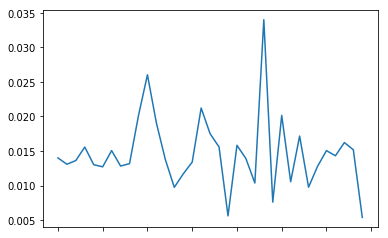

In [147]:
xlinks['ASSET_CYBERATTACKS'].plot.line()

In [143]:
xlinks.to_csv('20181012_risk_timeseries.csv')

In [144]:
xlinks_from_csv = pd.read_csv('20181012_risk_timeseries.csv', index_col=0)

In [145]:
xlinks_from_csv

,ASSET_BIODIVERSITY,ASSET_CRITICALINFO,ASSET_CRITICALINFRA,ASSET_CYBERATTACKS,ASSET_DATAFRAUD,ASSET_DEFLATION,ASSET_ENERGY,ASSET_FAILURECLIMATE,ASSET_FAILUREURBAN,ASSET_FINANCIALMECH,...,TERRORIST_UNEMPLOYMENT,TERRORIST_WATER,TERRORIST_WEATHEREVENTS,TERRORIST_WMD,UNEMPLOYMENT_WATER,UNEMPLOYMENT_WEATHEREVENTS,UNEMPLOYMENT_WMD,WATER_WEATHEREVENTS,WATER_WMD,WEATHEREVENTS_WMD
2018W01,0.015514,0.027157,0.033558,0.013999,0.029515,0.017090,0.048068,0.033105,0.035499,0.078148,...,0.036117,0.045568,0.049550,0.080109,0.059139,0.072669,0.063747,0.078135,0.082461,0.076176
2018W02,0.015556,0.026634,0.036592,0.013080,0.031817,0.029630,0.055985,0.032649,0.026325,0.101493,...,0.030490,0.044768,0.050988,0.075545,0.053036,0.054084,0.056406,0.070087,0.070217,0.078474
2018W03,0.008687,0.029494,0.046430,0.013615,0.030219,0.005329,0.062821,0.033338,0.034197,0.104651,...,0.043468,0.051143,0.050438,0.076177,0.061745,0.059905,0.058747,0.075591,0.068815,0.064226
2018W04,0.014648,0.031405,0.046180,0.015570,0.034972,0.016109,0.066188,0.034884,0.026211,0.111258,...,0.038602,0.046710,0.049515,0.076196,0.055711,0.054502,0.054239,0.084215,0.059294,0.065169
2018W05,0.009817,0.029071,0.047228,0.013015,0.029245,0.015484,0.061706,0.028255,0.025067,0.116395,...,0.030958,0.042715,0.047532,0.074147,0.051825,0.049761,0.049696,0.071957,0.056423,0.063637
2018W06,0.009276,0.037251,0.056413,0.012707,0.039053,0.014403,0.067509,0.038848,0.034649,0.125179,...,0.037073,0.038945,0.046851,0.082812,0.054806,0.053476,0.053620,0.068006,0.056925,0.071523
2018W07,0.016883,0.029916,0.048963,0.015056,0.035819,0.012662,0.065042,0.043123,0.031017,0.108581,...,0.037872,0.043286,0.050201,0.076960,0.049810,0.057548,0.053357,0.069192,0.054960,0.066747
2018W08,0.011761,0.031517,0.042601,0.012817,0.028850,0.013345,0.053957,0.034286,0.027142,0.079010,...,0.041105,0.049982,0.050694,0.085047,0.057395,0.060704,0.058382,0.079902,0.062783,0.070027
2018W09,0.014706,0.026737,0.036962,0.013174,0.029748,0.011033,0.045754,0.032538,0.024622,0.076688,...,0.029068,0.046950,0.042376,0.071070,0.052463,0.065091,0.055411,0.070928,0.063720,0.059863
2018W10,0.016864,0.029633,0.038215,0.020128,0.032729,0.016108,0.046682,0.035679,0.024678,0.081351,...,0.038698,0.046174,0.048946,0.094110,0.046348,0.050858,0.057029,0.074131,0.064085,0.063031


In [1]:
!pwd

/Users/bluebalam/projectsX/libreai/projects/minerva/notebooks
